In [1]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:

path = r"C:\Users\fabcr\0A_Jupyter_Lab\DHBW\06_Semester\Seems Dancy\Images_tes\Base"
img_list=os.listdir(r"C:\Users\fabcr\0A_Jupyter_Lab\DHBW\06_Semester\Seems Dancy\Images_tes\Base")


In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)


##Kopiert, weiß nicht wofür die funktionen sind
#skew correction 
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

##########
# Neu
def torgb(image):
    return cv2.cvtColor((image), cv2.COLOR_BGR2RGB)


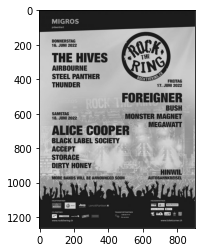

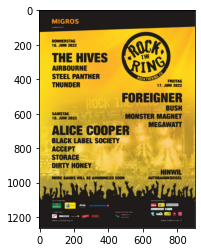

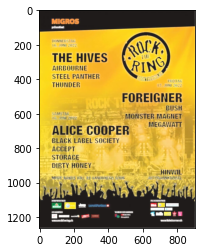

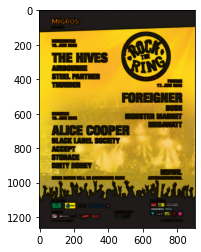

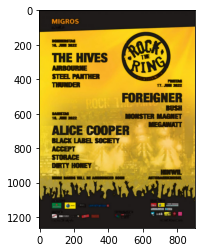

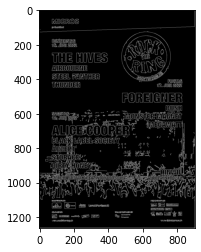

In [4]:
def display(image):
    image = torgb(image)
    plt.imshow(image)
    plt.show()


def open_img(path, image):
    return cv2.imread(path + '\\' + image)



rb_base = open_img(path,'Rock_am_Ring.jpeg' )
display(get_grayscale(rb_base))
display(remove_noise(rb_base))
# display(thresholding(rb_base))  #Bräuchte erst noch eine konvertierung zu 16 bit grafik 
display(dilate(rb_base))
display(erode(rb_base))
display(opening(rb_base))
display(canny(rb_base))

# display(deskew(rb_base))

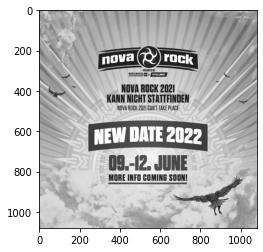

SON OCK 2021 WA
Ss KANN NICHT STATTFINDEN / L.

NOVA ROGK 2021 CAN'T TAKE PLAGE

09,-12. JUNE

_______________________


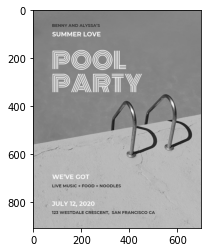

SUMMER LOVE

POOL
ONAN


_______________________


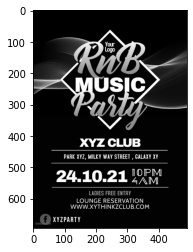

Your
Logo

SIC

——

XYZ CLUB

PARK XYZ, MILKY WAY STREET , GALAXY XY

24.10.21. i!

LADIES FREE ENTRY

LOUNGE RESERVATION
WWW.XYTHINKZCLUB.COM

2) xvzparty


_______________________


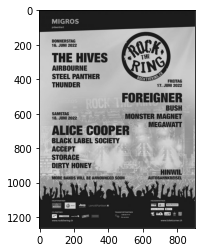

MIGROS

prasentiert

DONNERSTAG
16. JUNI 2022
THE HIVES
AIRBOURNE
STEEL PANTHER
THUNDER a ema
FOREIGNER
BUSH
$6, Jn 2a22 MONSTER MAGNET
MEGAWATT
ALICE COOPER
BLACK LABEL SOCIETY
ACCEPT
STORACE
DIRTY HONEY.
HINWIL

MORE BANDS WILL BE ANNOUNCED SOON AUTOBAHNKREISEL

HAUPTPARTNER (MEDIENPARTNER
Heineken’ ek

CCO-PARTNER

www.rockthering.ch wwwsticketcorner.ch


_______________________


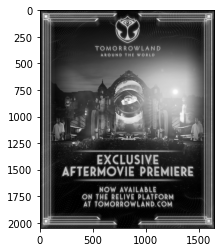

TOMORROWLAND

AROUND THE WORLD

EXCLUSIVE
AFTERMOVIE PREMIERE
NOW AVAILABLE

ON THE RELIVE PLATFORM
AT TOMORROWLAND.COM


_______________________


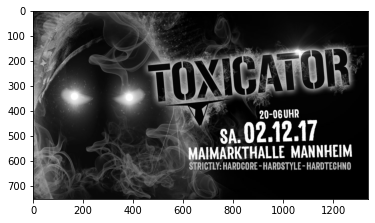


_______________________


In [5]:
img_liste_extra = []

for image in img_list:
    img_liste_extra.append(open_img(path, image))

    

for image in range(len(img_liste_extra)):
    display(get_grayscale(img_liste_extra[image]))
    print(pytesseract.image_to_string(get_grayscale(img_liste_extra[image])))
    print('_______________________')

In [6]:
sol = ''

def image_test(path, image_path, sol):
    rb_base = open_img(path,image_path)
        
    display(get_grayscale(rb_base))
    sol = sol + pytesseract.image_to_string(get_grayscale(rb_base))
    print('_______________________')
    
    display(remove_noise(rb_base))
    sol = sol + pytesseract.image_to_string(remove_noise(rb_base))
    print('_______________________')
    
    display(dilate(rb_base))
    sol = sol + pytesseract.image_to_string(dilate(rb_base))
    print('_______________________')
    
    display(erode(rb_base))
    sol = sol + pytesseract.image_to_string(erode(rb_base))
    print('_______________________')
    
    display(opening(rb_base))
    sol = sol + pytesseract.image_to_string(opening(rb_base))
    print('_______________________')
    
    display(canny(rb_base))
    sol = sol + pytesseract.image_to_string(canny(rb_base))
    print('_______________________')
    return sol
    

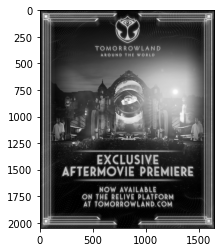

_______________________


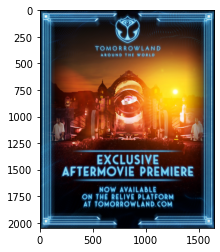

_______________________


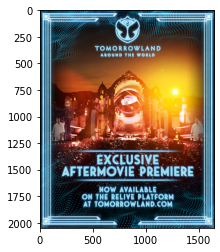

_______________________


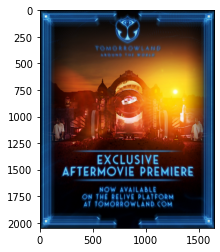

_______________________


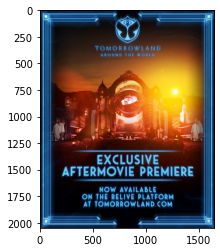

_______________________


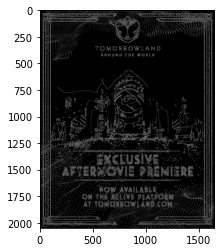

_______________________


In [7]:
sol = image_test(path,img_list[4], sol)

# Keywords

In [8]:
import yake #scheiße

def kw_yake(string):
    kw_extractor = yake.KeywordExtractor(top=20, stopwords=None)
    keywords = kw_extractor.extract_keywords(string)
    for kw, v in keywords:
        print("Keyphrase: ",kw, ": score", v)

In [9]:
kw_yake(sol)

Keyphrase:  AFTERMOVIE PREMIERE : score 0.015453235377166096
Keyphrase:  WORLD EXCLUSIVE : score 0.02439960032651708
Keyphrase:  EXCLUSIVE : score 0.04780376405638059
Keyphrase:  AFTERMOVIE : score 0.04955006584007068
Keyphrase:  WORLD : score 0.05707181517794166
Keyphrase:  PREMIERE : score 0.05874314107752228
Keyphrase:  RELIVE PLATFORM : score 0.06503371460177106
Keyphrase:  TOMORROWLAND : score 0.08166421274028257
Keyphrase:  RELIVE : score 0.10762855768231908
Keyphrase:  AFTERMOVIE PREMIE : score 0.13386441748194927
Keyphrase:  PLATFORM : score 0.17823189630511602
Keyphrase:  RELIVE PLat DLA : score 0.1946459170438845
Keyphrase:  RELIVE PLat : score 0.3398213757442439
Keyphrase:  TOMORROWLAND.COM : score 0.36495870640870987
Keyphrase:  AILABLE : score 0.38857737604013104
Keyphrase:  DLA : score 0.3919629872395226
Keyphrase:  PLat DLA : score 0.44486367899488244
Keyphrase:  OUND : score 0.4514217877355304
Keyphrase:  PREMIE : score 0.47652949385826626
Keyphrase:  wae : score 0.7478

In [10]:
from summa import keywords #naja

def kw_summa(string):
    TR_keywords = keywords.keywords(string, scores=True)
    print(TR_keywords[0:10])

In [11]:
kw_summa(sol)

[('exclusive', 0.26542839618342967), ('tomorrowland', 0.26538822542507995), ('r', 0.23256227847857525), ('premiere', 0.2274225743439304), ('world', 0.2109630042612751), ('aftermovie', 0.20700655913372273)]


In [12]:
from keybert import KeyBERT #naja

def kw_keybert(string):
    kw_model = KeyBERT(model='all-mpnet-base-v2')
    
    keywords = kw_model.extract_keywords(string, 
                                     keyphrase_ngram_range=(1, 5), 
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=15)

    keywords_list= list(dict(keywords).keys())
    print(keywords_list)

In [13]:
kw_keybert(sol)

['tomorrowland world exclusive aftermovie', 'tomorrowland world exclusive aftermovie premiere', 'wy tomorrowland world exclusive aftermovie', 'tomorrowland world po exclusive aftermovie', 'tomorrowland com world exclusive aftermovie', 'tomorrowland world', 'tomorrowland world exclusive', 'tomorrowland world exclusive aftermovie premie', 'tomorrowland com ww', 'tomorrowland world po', 'tomorrowland com ww ul ound', 'tomorrowland world po exclusive', 'tomorrowland com', 'tomorrowland com world exclusive', 'wy tomorrowland world']
